In [1]:
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from joblib import dump
from imblearn.over_sampling import SMOTE
from utils.drawing import *

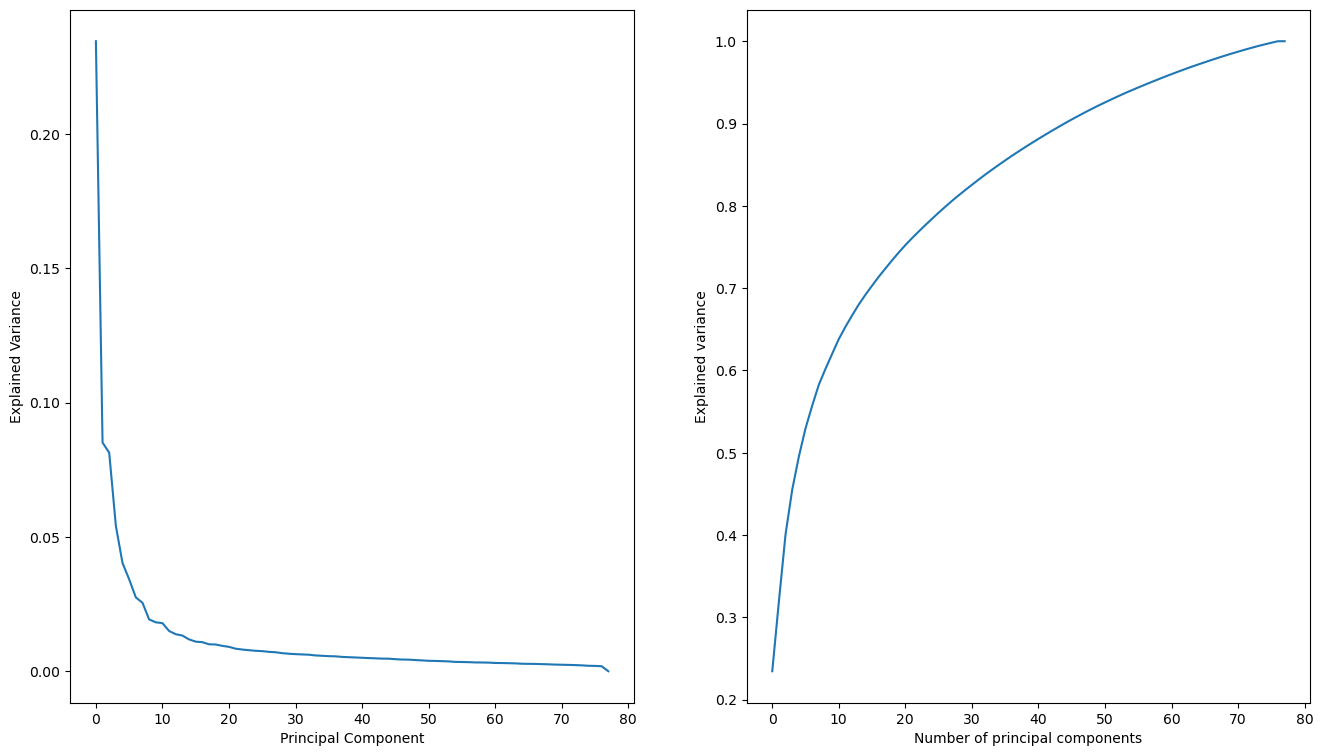

In [2]:
X_train, X_test, y_train, y_test, pca_names, df = load_preprocess_data('../../2023_Data_Mining_Brain_cancer_Dataset/dataset/Brain_GSE50161.csv',
                                                        ['samples','type'], 'type')

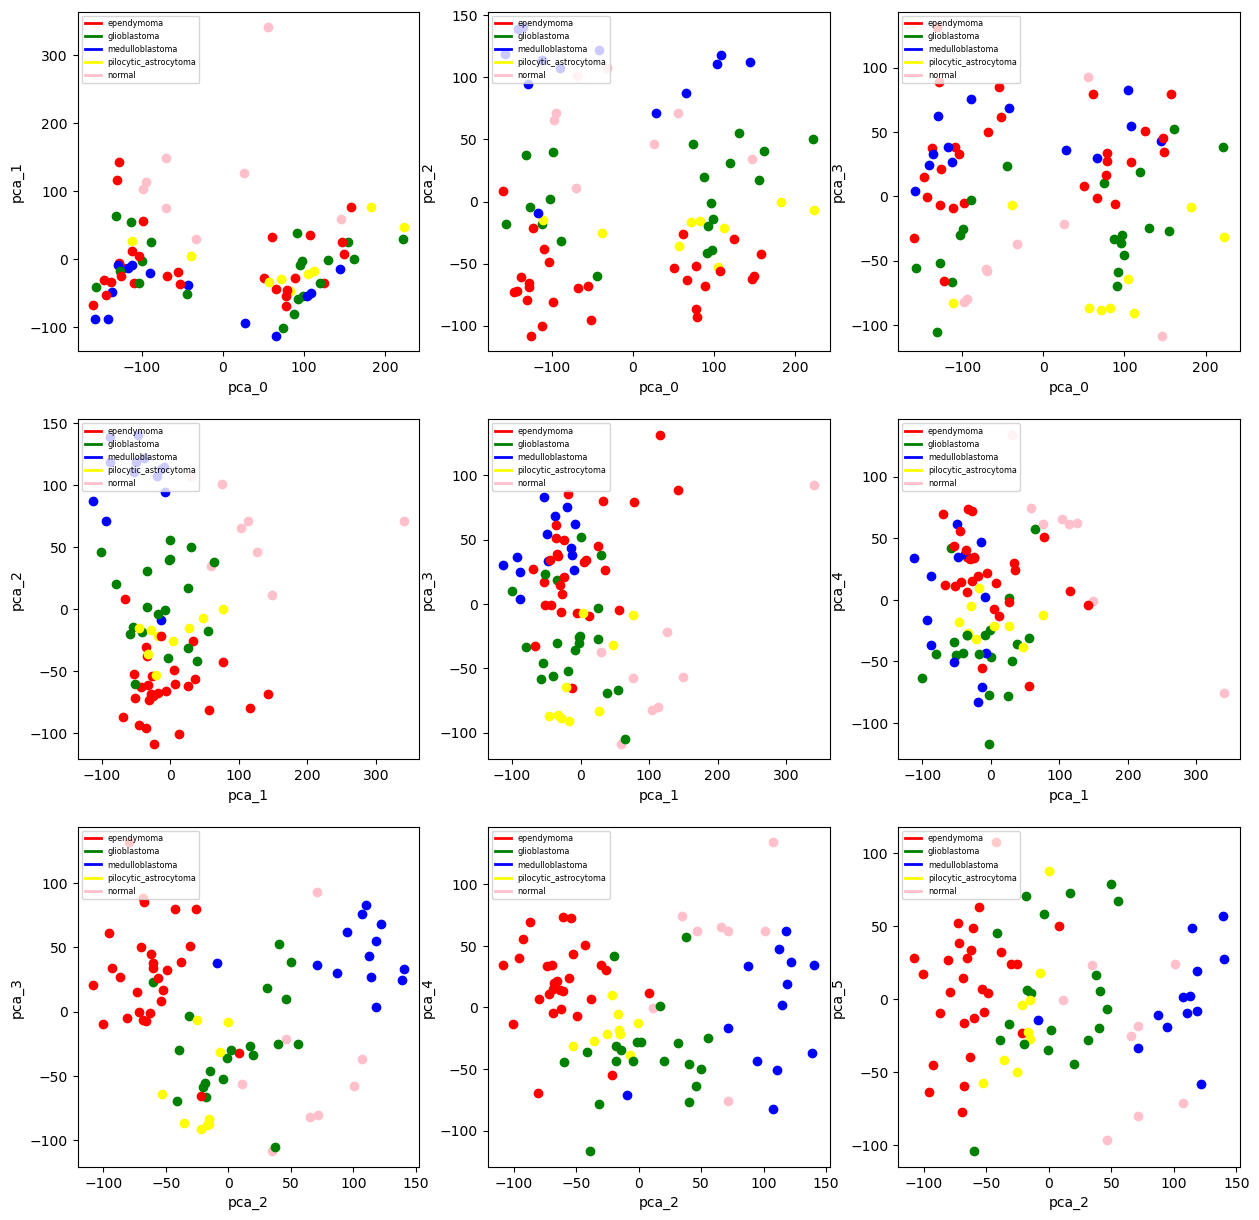

In [3]:
df_pca = pd.DataFrame(X_train, columns = pca_names)
print_classes(3,3,np.array(y_train),df_pca)

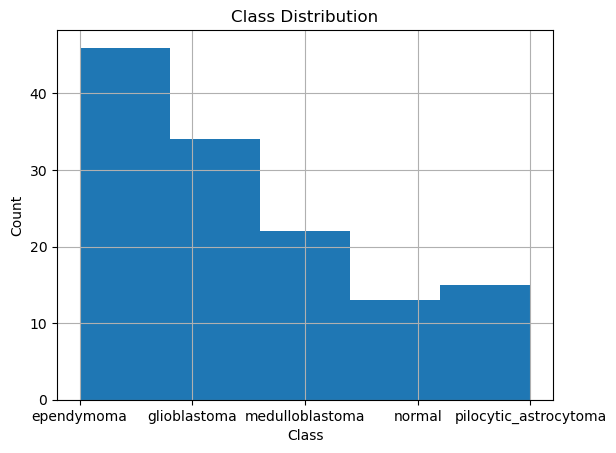

In [4]:
plot_class_distribution(df, 'type')

In [5]:

params = {
    'oob_score' : [True, False],
    'max_features': ['log2', 'sqrt'],
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'min_samples_split' : [2,4,8],
    'max_depth' : [None, 10,20,40]
}
estimator_NO_SMOTE = GridSearchCV(RandomForestClassifier(), param_grid= params, cv= 3, verbose= 1)

In [6]:
estimator_NO_SMOTE.fit(X_train,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [2, 4, 8],
                         'oob_score': [True, False]},
             verbose=1)

In [7]:
estimator_NO_SMOTE.best_params_

{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'oob_score': False}

In [8]:
y_predict_NO_SMOTE = estimator_NO_SMOTE.best_estimator_.predict(X_test)
accuracy_score_NO_SMOTE = accuracy_score(y_predict_NO_SMOTE, y_test)
f1_score_NO_SMOTE = f1_score(y_predict_NO_SMOTE, y_test, average='weighted')
print(accuracy_score_NO_SMOTE, f1_score_NO_SMOTE)

0.8653846153846154 0.9153460059032815


CONFUSION MATRIX


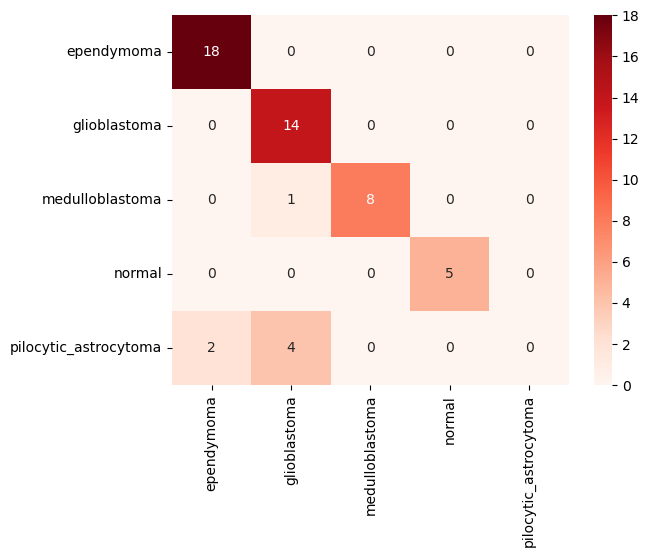

In [9]:
data = confusion_matrix(y_test, y_predict_NO_SMOTE)
print("CONFUSION MATRIX")
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

SMOTE

In [10]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

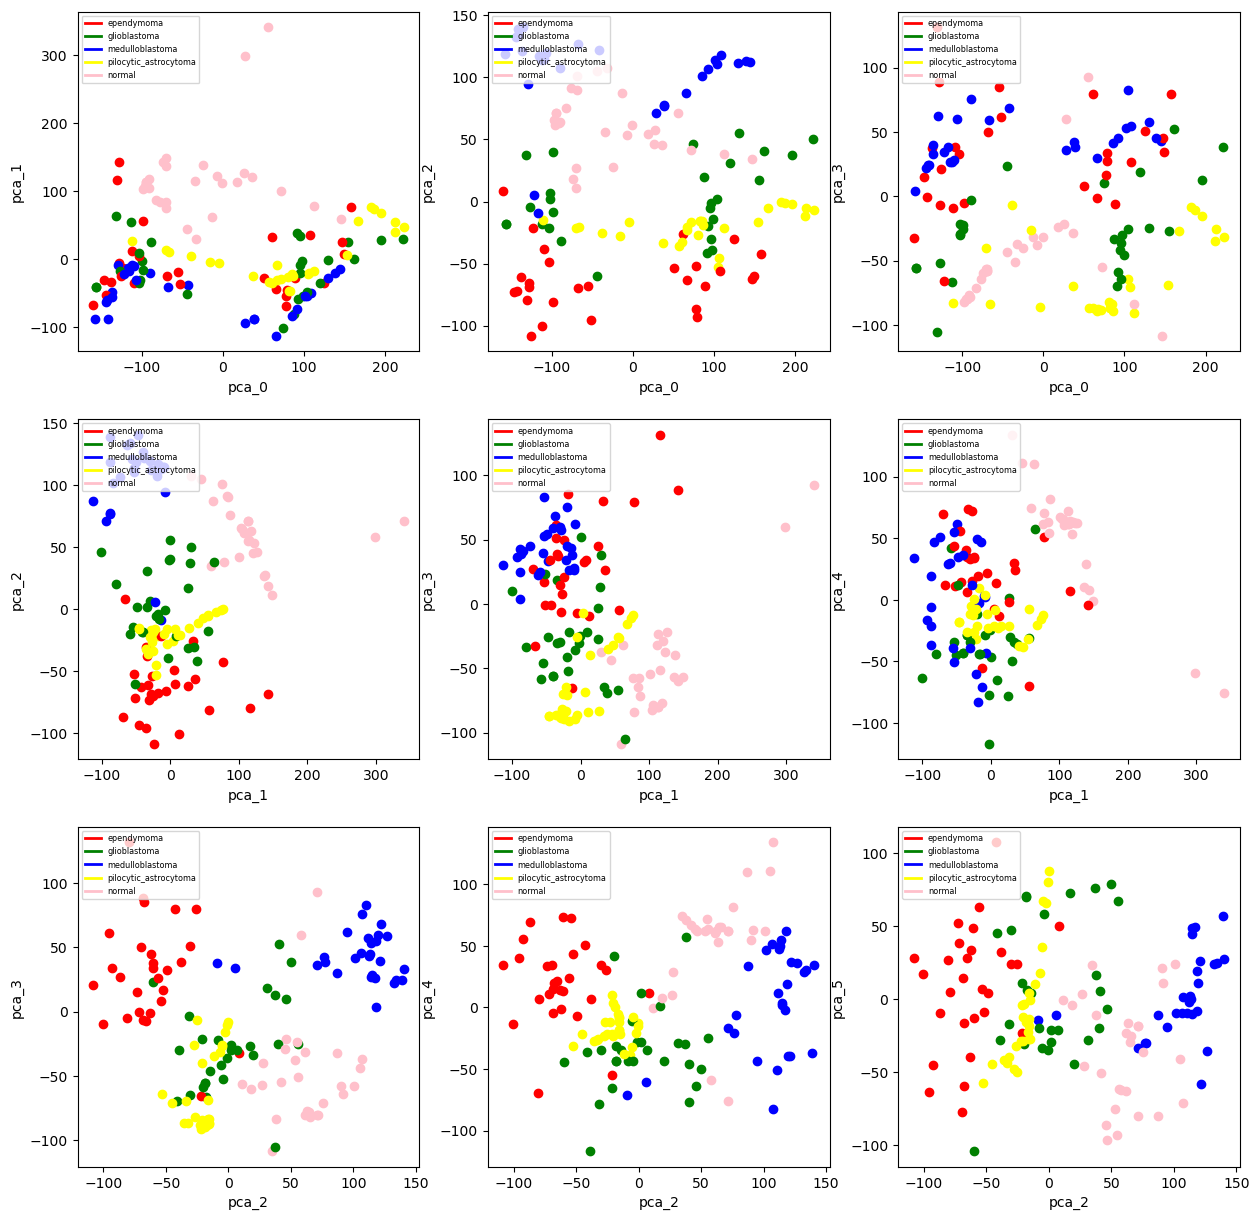

In [11]:
df_pca_SMOTE = pd.DataFrame(X_train_smote, columns = pca_names)
print_classes(3 ,3 ,np.array(y_train_smote) , df_pca_SMOTE)

In [12]:
estimator_SMOTE = GridSearchCV(RandomForestClassifier(), param_grid= params, cv= 5, verbose= 3)
estimator_SMOTE.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=True;, score=0.929 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=True;, score=0.893 total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=True;, score=0.964 total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=True;, score=0.964 total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=True;, score=1.000 total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=False;, score=0.893 total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, max_features=log2, min_samples_split=2, oob_score=False;, score=0.857 total time=   0.1s
[CV 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 40],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_split': [2, 4, 8],
                         'oob_score': [True, False]},
             verbose=3)

In [13]:
estimator_SMOTE.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'oob_score': True}

In [14]:
y_predict_SMOTE = estimator_SMOTE.best_estimator_.predict(X_test)
accuracy_score_SMOTE = accuracy_score(y_predict_SMOTE, y_test)
f1_score_SMOTE = f1_score(y_predict_SMOTE, y_test, average='weighted')
print(accuracy_score_SMOTE, f1_score_SMOTE)

0.9615384615384616 0.9618441971383148


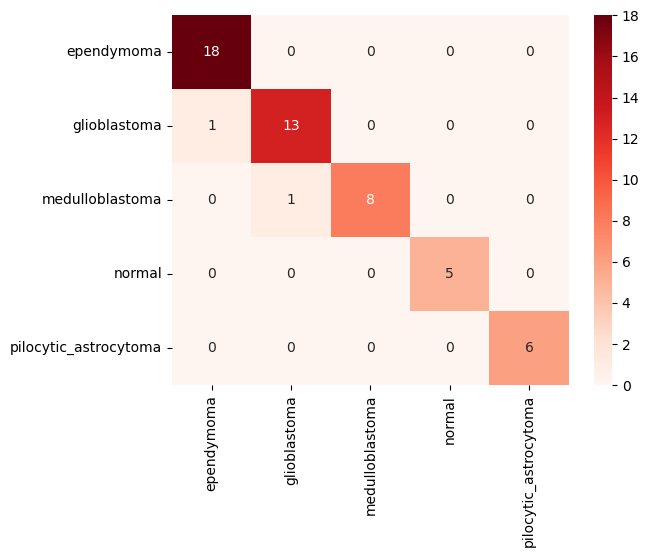

In [15]:
data = confusion_matrix(y_test, y_predict_SMOTE)
_ = sns.heatmap(data, annot=True, fmt='g', xticklabels=df['type'].unique(), yticklabels=df['type'].unique(), cmap = plt.cm.Reds)

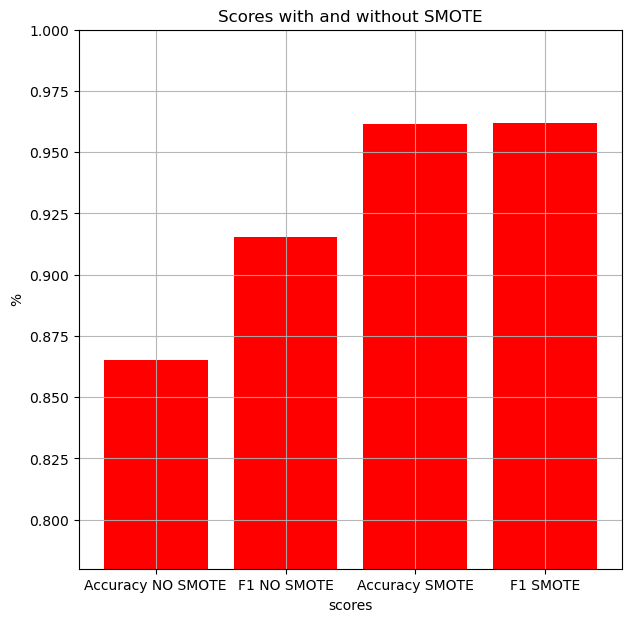

In [18]:
labels = ['Accuracy NO SMOTE', 'F1 NO SMOTE', 'Accuracy SMOTE', 'F1 SMOTE']
values = [accuracy_score_NO_SMOTE,f1_score_NO_SMOTE,accuracy_score_SMOTE,f1_score_SMOTE]
plt.figure(figsize=(7,7))
plt.bar(labels, values, color = 'red')
plt.grid(alpha=0.9)
plt.ylim(0.78, 1)
plt.xlabel('scores')
plt.ylabel('%')
plt.title('Scores with and without SMOTE')
plt.show()

NO SMOTE
{'criterion': 'gini',
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'oob_score': False}

SMOTE
    {'criterion': 'entropy',
    'max_depth': 10,
    'max_features': 'sqrt',
    'min_samples_split': 4,
    'oob_score': True}

In [19]:
accuracies_NO_SMOTE_oob = []
accuracies_NO_SMOTE_no_oob = []
for i in range(1,101):
    model_oob = RandomForestClassifier(criterion='gini',max_depth=i,min_samples_split=4, oob_score=True, max_features='sqrt')
    model_no_oob = RandomForestClassifier(criterion='gini',max_depth=i,min_samples_split=4, oob_score=False, max_features='sqrt')
    model_oob.fit(X_train,y_train)
    model_no_oob.fit(X_train,y_train)

    y_pred_oob = model_oob.predict(X_test)
    y_pred_no_oob = model_no_oob.predict(X_test)

    accuracies_NO_SMOTE_oob.append(accuracy_score(y_pred_oob, y_test))
    accuracies_NO_SMOTE_no_oob.append(accuracy_score(y_pred_no_oob, y_test))


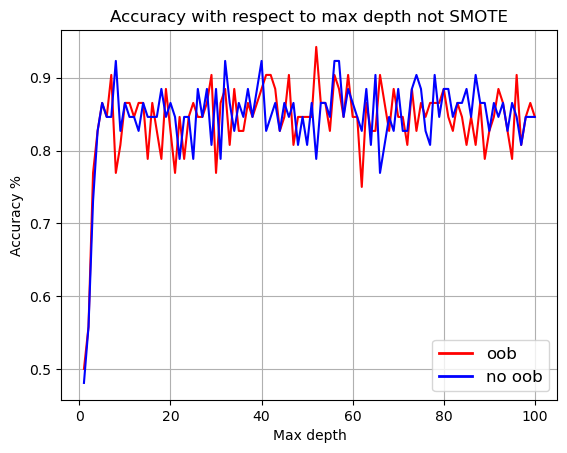

In [30]:
plt.plot(range(1,101), accuracies_NO_SMOTE_oob, c = 'red')
plt.plot(range(1,101), accuracies_NO_SMOTE_no_oob, c = 'blue')
custom_lines = [Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], color='blue', lw=2),]
names = ['oob','no oob']
plt.grid(0.6)
plt.xlabel('Max depth')
plt.ylabel('Accuracy %')
plt.title('Accuracy with respect to max depth not SMOTE')
plt.legend(custom_lines,names, loc = 'lower right', fontsize = 'large')

In [31]:
accuracies_NO_SMOTE_oob = []
accuracies_NO_SMOTE_no_oob = []
for i in range(1,101):
    model_oob = RandomForestClassifier(criterion='gini',max_depth=i,min_samples_split=4, oob_score=True, max_features='sqrt')
    model_no_oob = RandomForestClassifier(criterion='gini',max_depth=i,min_samples_split=4, oob_score=False, max_features='sqrt')
    model_oob.fit(X_train_smote,y_train_smote)
    model_no_oob.fit(X_train_smote,y_train_smote)

    y_pred_oob = model_oob.predict(X_test)
    y_pred_no_oob = model_no_oob.predict(X_test)

    accuracies_NO_SMOTE_oob.append(accuracy_score(y_pred_oob, y_test))
    accuracies_NO_SMOTE_no_oob.append(accuracy_score(y_pred_no_oob, y_test))

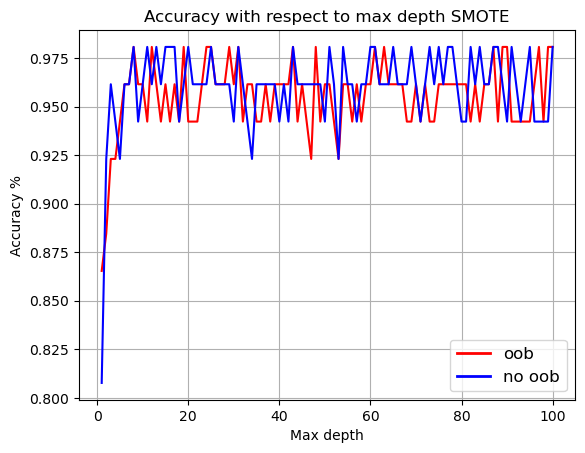

In [32]:
plt.plot(range(1,101), accuracies_NO_SMOTE_oob, c = 'red')
plt.plot(range(1,101), accuracies_NO_SMOTE_no_oob, c = 'blue')
custom_lines = [Line2D([0], [0], color='red', lw=2),
                    Line2D([0], [0], color='blue', lw=2),]
names = ['oob','no oob']
plt.grid(0.6)
plt.xlabel('Max depth')
plt.ylabel('Accuracy %')
plt.title('Accuracy with respect to max depth SMOTE')
plt.legend(custom_lines,names, loc = 'lower right', fontsize = 'large')

In [33]:
dump(estimator_NO_SMOTE, 'rf_no_smote.pkl')
dump(estimator_NO_SMOTE, 'rf_smote.pkl')

['rf_smote.pkl']

In [35]:
estimator_SMOTE.best_estimator_.feature_importances_.shape

(78,)

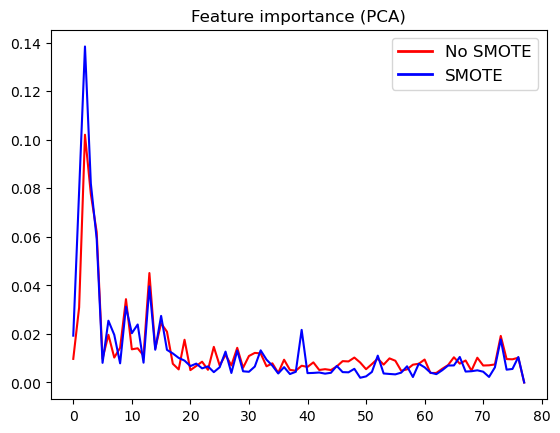

In [43]:
plt.plot(range(estimator_NO_SMOTE.best_estimator_.feature_importances_.shape[0]), estimator_NO_SMOTE.best_estimator_.feature_importances_,c = 'red')
plt.plot(range(estimator_SMOTE.best_estimator_.feature_importances_.shape[0]), estimator_SMOTE.best_estimator_.feature_importances_, c = 'blue')
plt.title('Feature importance (PCA)')
plt.legend(custom_lines,['No SMOTE','SMOTE'], loc = 'upper right', fontsize = 'large')